# COMP5310 - Project 2: Bank Marketing 

### Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.  

**The below data set is used for this project:**  
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010).  

**Attribute Information:**

**Input variables:**  
***Bank client data:***  
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical:    'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default? (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')  
***Related with the last contact of the current and previous campaigns:***  
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric).  
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
***Social and economic context attributes***  
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  

**Output variable (desired target):**  
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
# load the data
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
# check the first 5 rows of the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# rename target variable column to 'response' (it's the customer's response to the campaign)
df.rename(columns = {'y':'response'}, inplace = True)

In [5]:
# check the shape of the data, the variables and the types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### Exploratory Data Analysis (EDA)
#### Descriptive Statistics
Let's check the statistics on the numerical and categorical variables in our dataset

In [6]:
# check the statistics of the numerical attributes (mean, std, min, max, etc)
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# check the statistics of the categorical attributes (count, frequency, etc)
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,response
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Let's see if the dataset contains any missing (null) values

In [8]:
# checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

**Note:** On the surface, looks like there is no missing (null) values in the dataset. Let's continue with our analysis.  
#### Output Variable: Customer Response

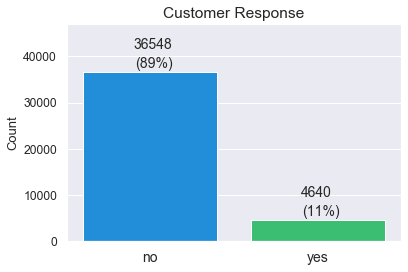

In [9]:
# using countplot to see the number of customer response in the dataset
sns.set(font_scale=1.1,palette = 'terrain')
ax = sns.countplot(x='response', data=df)
plt.title("Customer Response",size=15.5)
df['response'].value_counts()
x = list(df['response'].value_counts())
y = x[0] + x[1]
for p in ax.patches:
    height = p.get_height()
    heightp = height/y*100
    ax.text(p.get_x()+0.30, height+5000, f"{height}",size=14)
    ax.text(p.get_x()+0.31, height+1000, '(%.0f%%)'%(heightp),size=14)
ax.set_ylim([0,47000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14,)

**Note:** From the chart, it can be seen that the Bank Marketing dataset is not balanced (only 11% customers subscribed to the Term Deposit with the bank). Building a model on imbalanced dataset can result in a model that overfits the majority class (the 'NO's') but oblivious to the minorities (the 'YES's'), hence will fail miserably on new data. We will address this issue later. For now, let's continue with our analysis and explore the other categorical variables first.
#### Categorical Variables
#### Customer Marital Status

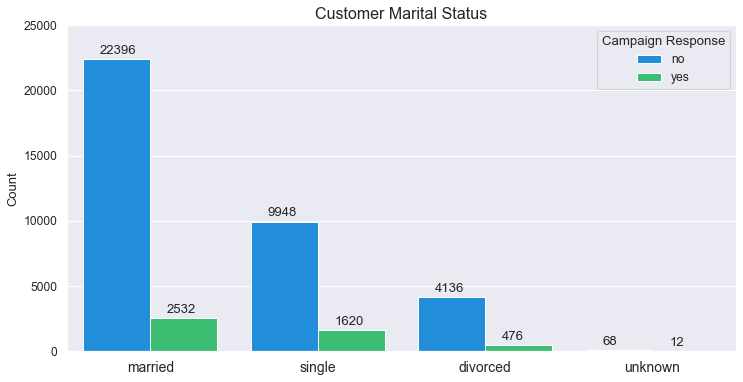

In [10]:
# marital column
plt.figure(figsize=(12,6))
ax = sns.countplot(x='marital', data=df, hue='response')
x = list(df['marital'].value_counts())
y = x + x
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    ax.text(p.get_x()+0.1, height+400, '%.0f'%(height))
    z += 1
ax.set_title("Customer Marital Status",size=16)
ax.set_ylim([0,25000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

Some unknowns are noted in the marital status attribute. Because it is such a small amount (less than 0.2%), we will remove them from the dataset.

In [11]:
# remove the unknowns
df = df[df['marital']!='unknown']

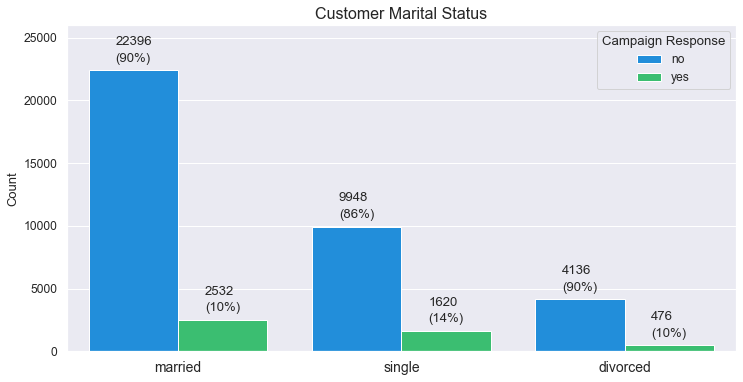

In [12]:
# plot the data
plt.figure(figsize=(12,6))
ax = sns.countplot(x='marital', data=df, hue='response')
x = list(df['marital'].value_counts())
y = x + x
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    ax.text(p.get_x()+0.12, height+2000, f"{height}")
    ax.text(p.get_x()+0.12, height+700, '(%.0f%%)'%(heightp))
    z += 1
ax.set_title("Customer Marital Status",size=16)
ax.set_ylim([0,26000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

**Note:** Single people have slightly higher subscription rate compared to married and divorced customers.
#### Customer Education Status

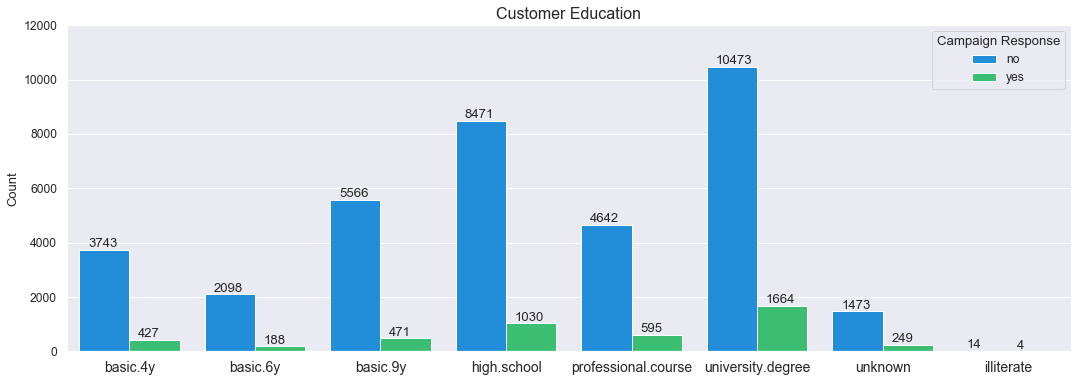

In [13]:
# education column
plt.figure(figsize=(18,6))
ax = sns.countplot(x='education', data=df, hue='response', order=['basic.4y','basic.6y','basic.9y',
                                                                  'high.school','professional.course',
                                                                 'university.degree','unknown','illiterate'])
x = list(df['education'].value_counts())
y = x + x
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    ax.text(p.get_x()+0.07, height+100, '%.0f'%(height))
    z += 1
ax.set_title("Customer Education",size=16)
ax.set_ylim([0,12000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

**Outliers:** There is a small amount of illiterate customers in the data (less than 0.1%). They will be removed to reduce noise.    
**Unknown:** There are 1,722 missing values in 'education'. Because removing a large amount of data can lead to loss of information and poor predicting outcomes, cross-tabulation between 'education' and ‘job’ will be used to impute the missing values. The assumption here is that 'job' is influenced by the 'education' of a person, and therefore, someone’s education can be inferred by their job (eg. people in management jobs usually have a university degree, hence all customers with management jobs will be assigned to ‘university.degree’).

In [14]:
# remove 'illiterate' category from the data
df = df[df['education'] != 'illiterate']

In [15]:
# cross-tabulation between 'job' and 'education'
df2 = df.groupby(['job','education'])
df3 = df2['age'].count()
df3.unstack()

education,basic.4y,basic.6y,basic.9y,high.school,professional.course,university.degree,unknown
job,,,,,,,
admin.,77,151,499,3328,362,5741,249
blue-collar,2315,1423,3620,875,453,94,452
entrepreneur,137,71,210,233,135,608,57
housemaid,473,77,94,174,59,137,42
management,100,85,166,297,89,2061,123
retired,595,75,143,276,241,284,98
self-employed,93,23,220,118,166,764,29
services,132,226,388,2678,217,173,149
student,26,13,98,357,43,170,167


In [16]:
# assign the unknown data based on their jobs
df.loc[(df['education']=='unknown') & (df['job']=='admin.'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='blue-collar'), 'education'] = 'basic.9y'
df.loc[(df['education']=='unknown') & (df['job']=='entrepreneur'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='retired'), 'education'] = 'basic.4y'
df.loc[(df['education']=='unknown') & (df['job']=='self-employed'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='student'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='technician'), 'education'] = 'professional.course'
df.loc[(df['education']=='unknown') & (df['job']=='unemployed'), 'education'] = 'university.degree'

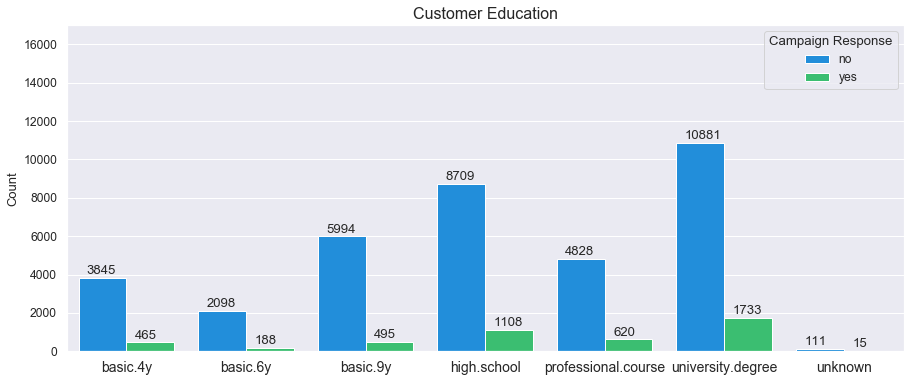

In [17]:
# plot the data
plt.figure(figsize=(15,6))
ax = sns.countplot(x='education', data=df, hue='response', order=['basic.4y','basic.6y','basic.9y',
                                                                  'high.school','professional.course',
                                                                 'university.degree','unknown'])
x = list(df['education'].value_counts())
y = x + x
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    ax.text(p.get_x()+0.07, height+200, '%.0f'%(height))
    z += 1
ax.set_title("Customer Education",size=16)
ax.set_ylim([0,17000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

After performing the above data cleaning, there are still 126 'unknown' data in the 'education' column. Due to the small amount (0.3%), they will be removed.

In [18]:
# remove the remaining unknowns
df = df[df['education']!='unknown']

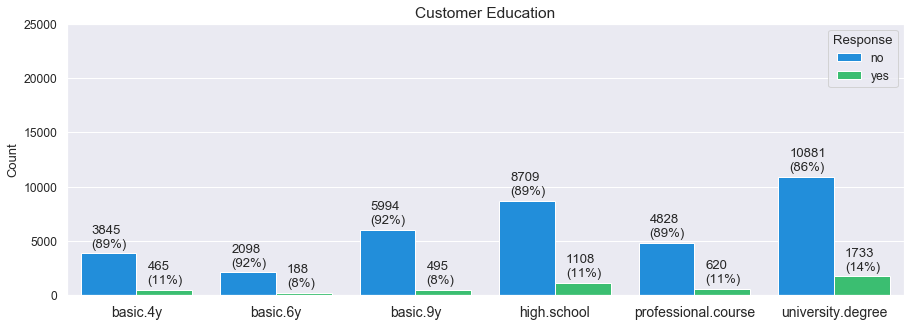

In [19]:
# plot the data
plt.figure(figsize=(15,5))
ax = sns.countplot(x='education', data=df, hue='response', order=['basic.4y','basic.6y','basic.9y',
                                                                  'high.school','professional.course',
                                                                 'university.degree'])
y = [4310,2286,6489,9817,5448,12614,4310,2286,6489,9817,5448,12614]
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    ax.text(p.get_x()+0.08, height+1900, f"{height}")
    ax.text(p.get_x()+0.08, height+600, '(%.0f%%)'%(heightp))
    z += 1
ax.set_title("Customer Education",size=15.5)
ax.set_ylim([0,25000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Response',loc=1)

**Note:** Customers that have a university degree seem more likely to subscribe to a term deposit
#### Customer Job Status

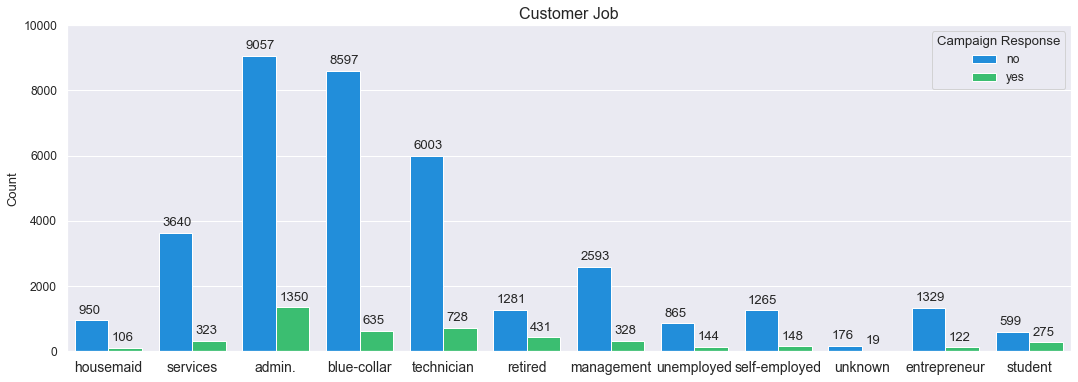

In [20]:
# job column
plt.figure(figsize=(18,6))
ax = sns.countplot(x='job', data=df, hue='response')
x = list(df['job'].value_counts())
y = x + x
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    ax.text(p.get_x()+0.04, height+200, '%.0f'%(height))
    z += 1
ax.set_title("Customer Job",size=16)
ax.set_ylim([0,10000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

There is less than 0.8% customers with 'unknown' job. Due to the small amount, they will be removed from the dataset.

In [21]:
# remove the unknowns in job column
df = df[df['job']!='unknown']

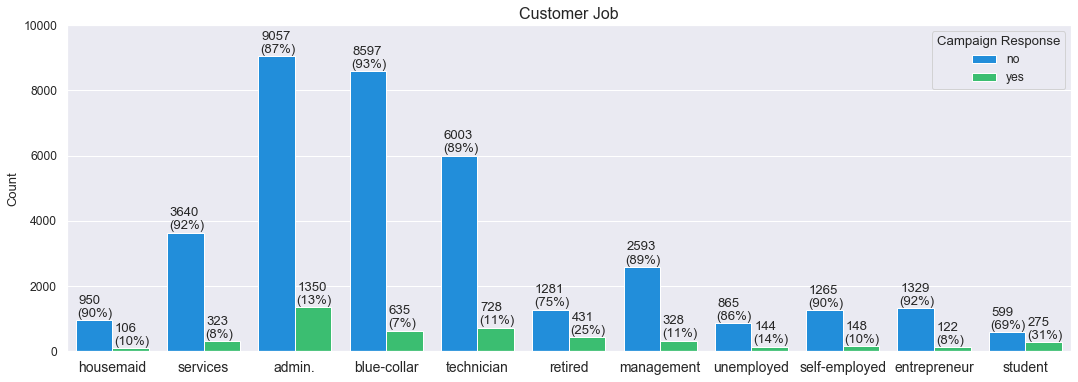

In [22]:
# job column
plt.figure(figsize=(18,6))
ax = sns.countplot(x='job', data=df, hue='response')
y = [1056,3963,10407,9232,6731,1712,2921,1009,1413,1451,874,1056,3963,10407,9232,6731,1712,2921,1009,1413,1451,874]
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    ax.text(p.get_x()+0.03, height+500, f"{height}")
    ax.text(p.get_x()+0.02, height+100, '(%.0f%%)'%(heightp))
    z += 1
ax.set_title("Customer Job",size=16)
ax.set_ylim([0,10000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

**Note:** From the chart, it can be seen that students and retirees responded well to the campaigns. Many of them subscribed to a term deposit when contacted during the campaigns.
#### Customer Default Status

no         32337
unknown     8429
yes            3
Name: default, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


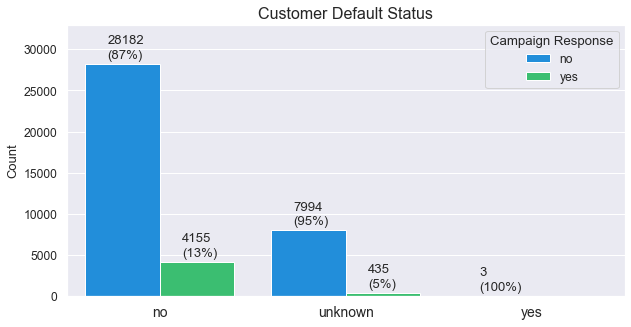

In [23]:
# default column
plt.figure(figsize=(10,5))
ax = sns.countplot(x='default', data=df, hue='response')
y = [32337,8429,3,32337,8429,3]
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    ax.text(p.get_x()+0.12, height+2500, '%.0f'%(height))
    ax.text(p.get_x()+0.12, height+700, '(%.0f%%)'%(heightp))
    z += 1
ax.set_title("Customer Default Status",size=16)
ax.set_ylim([0,33000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)
df['default'].value_counts()

**Note:** The unknowns in 'default' were quite high (20%) because many customers might not want to disclose if they defaulted on a loan previously. Because removing a large amount of data can lead to loss of information and poor predicting outcomes, it was decided to keep them in the dataset as a separate category.
#### Customer Housing Loan Status

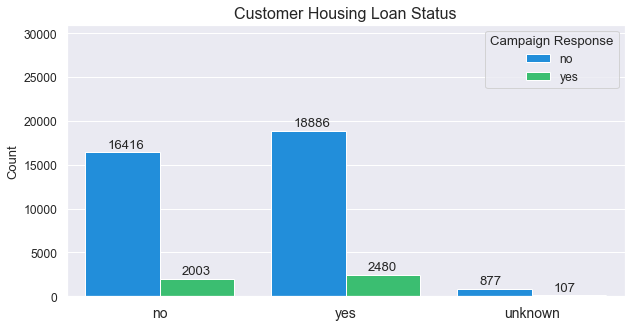

In [24]:
# housing column
plt.figure(figsize=(10,5))
ax = sns.countplot(x='housing', data=df, hue='response')
x = list(df['housing'].value_counts())
y = x + x
z = 0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.12, height+500, '%.0f'%(height))
    z += 1
ax.set_title("Customer Housing Loan Status",size=16)
ax.set_ylim([0,31000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

There are 984 unknowns data in the above chart. Because people's jobs are usually a good indicator whether they have housing loan or not, we will make an estimation based on the 'job' column. However, instead of assigning it to 'yes' or 'no' based on the majority, the unknowns here will be assigned to ‘yes’ and ‘no’ so that the proportion in each job category remains the same (eg. 55% technicians in the dataset have a housing loan, so 55% of the unknowns that are technicians were assigned to ‘yes’)

In [25]:
# cross-tabulation between 'housing' and 'job'
df8 = df.groupby(['job','housing']).count()
df9 = df8['age'].unstack()
df9

housing,no,unknown,yes
job,,,
admin.,4628,227,5552
blue-collar,4288,239,4705
entrepreneur,639,36,776
housemaid,490,29,537
management,1361,71,1489
retired,780,44,888
self-employed,636,40,737
services,1816,101,2046
student,380,23,471


In [26]:
# calculate the proportion of 'no'
df9['total'] = df9['no']+df9['yes']
df9['no percentage'] = df9['no']/df9['total']*100
df9

housing,no,unknown,yes,total,no percentage
job,,,,,
admin.,4628,227,5552,10180,45.461690
blue-collar,4288,239,4705,8993,47.681530
entrepreneur,639,36,776,1415,45.159011
housemaid,490,29,537,1027,47.711782
management,1361,71,1489,2850,47.754386
retired,780,44,888,1668,46.762590
self-employed,636,40,737,1373,46.321923
services,1816,101,2046,3862,47.022268
student,380,23,471,851,44.653349


In [27]:
# assign some to the 'no' based on the above proportion
for job in df['job'].unique():
    unknown_no = int(df9['unknown'][job]*df9['no percentage'][job]/100)
    index_unknown = df[(df['job']==job) & (df['housing']=='unknown')].index
    z1 = 0
    for ind in index_unknown:
        if z1<unknown_no:
            df.loc[ind,'housing'] = 'no'
            z1+=1

In [28]:
# assign the remaining to 'yes'
df.replace({'housing': {'unknown':'yes'}},inplace=True)

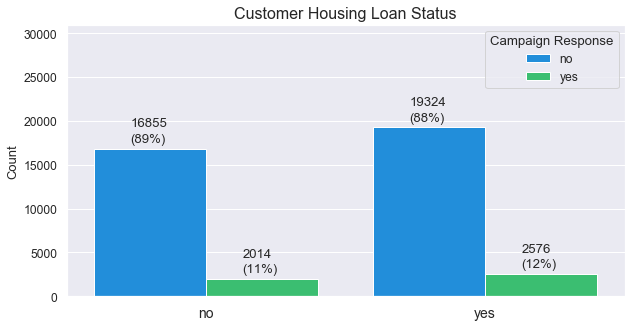

In [29]:
# plot the data
plt.figure(figsize=(10,5))
ax = sns.countplot(x='housing', data=df, hue='response')
x = list(df['housing'].value_counts())
y = [18869,21900,18869,21900]
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    #ax.text(p.get_x()+0.05, height+500, f"{height} ({round(heightp,0)}%)")
    ax.text(p.get_x()+0.13, height+2500, '%.0f'%(height))
    ax.text(p.get_x()+0.13, height+700, '(%.0f%%)'%(heightp))
    z += 1
ax.set_title("Customer Housing Loan Status",size=16)
ax.set_ylim([0,31000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

**Note:** The customer housing loan status doesn't seem to make much difference to the customer response.
#### Customer Personal Loan Status

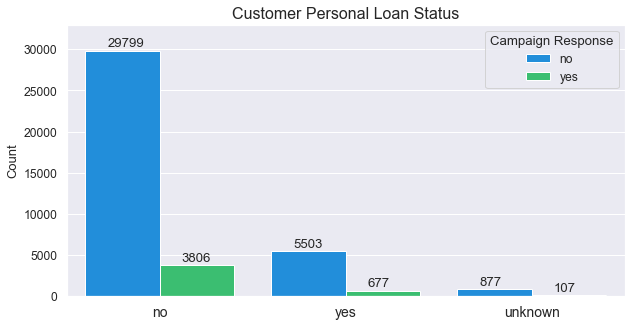

In [30]:
# loan column
plt.figure(figsize=(10,5))
ax = sns.countplot(x='loan', data=df, hue='response')
x = list(df['loan'].value_counts())
y = [18869,21900,18869,21900]
z = 0
for p in ax.patches:
    height = p.get_height()
    #heightp = height/y[z]*100
    ax.text(p.get_x()+0.12, height+500, '%.0f'%(height))
    z += 1
ax.set_title("Customer Personal Loan Status",size=16)
ax.set_ylim([0,33000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

Similar to the 'housing' column, we will assign the 'unknown' data in the 'loan' column, based on people's jobs, to keep the same proportion.

In [31]:
# cross-tabulation between 'loan' and 'job'
df10 = df.groupby(['job','loan']).count()
df11 = df10['age'].unstack()
df11

loan,no,unknown,yes
job,,,
admin.,8471,227,1709
blue-collar,7630,239,1363
entrepreneur,1210,36,205
housemaid,873,29,154
management,2411,71,439
retired,1429,44,239
self-employed,1179,40,194
services,3263,101,599
student,709,23,142


In [32]:
# calculate the proportion of 'no'
df11['total'] = df11['no']+df11['yes']
df11['no percentage'] = df11['no']/df11['total']*100
df11

loan,no,unknown,yes,total,no percentage
job,,,,,
admin.,8471,227,1709,10180,83.212181
blue-collar,7630,239,1363,8993,84.843767
entrepreneur,1210,36,205,1415,85.512367
housemaid,873,29,154,1027,85.004869
management,2411,71,439,2850,84.596491
retired,1429,44,239,1668,85.671463
self-employed,1179,40,194,1373,85.870357
services,3263,101,599,3862,84.489902
student,709,23,142,851,83.313749


In [33]:
# assign some to the 'no' based on the proportion above
for job in df['job'].unique():
    unknown_no = int(df11['unknown'][job]*df11['no percentage'][job]/100)
    index_unknown = df[(df['job']==job) & (df['loan']=='unknown')].index
    z1 = 0
    for ind in index_unknown:
        if z1<unknown_no:
            df.loc[ind,'loan'] = 'no'
            z1+=1

In [34]:
# assign the remaining to 'yes'
df.replace({'loan': {'unknown':'yes'}},inplace=True)

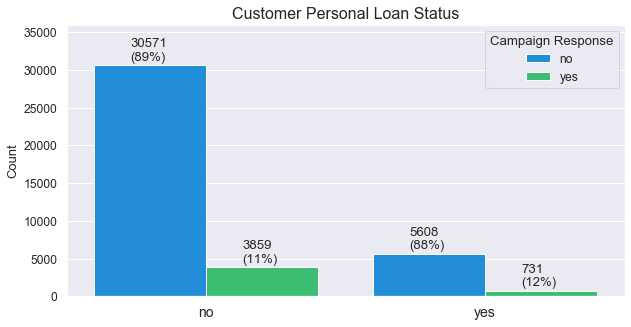

In [35]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='loan', data=df, hue='response')
x = list(df['loan'].value_counts())
y = x + x
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    #ax.text(p.get_x()+0.06, height+500, f"{height} ({round(heightp,0)}%)")
    ax.text(p.get_x()+0.13, height+2500, '%.0f'%(height))
    ax.text(p.get_x()+0.13, height+700, '(%.0f%%)'%(heightp))
    z += 1
ax.set_title("Customer Personal Loan Status",size=16)
ax.set_ylim([0,36000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

**Note:** Similar to 'housing', the customer personal loan status does not seem to have significant impact to the success rate.
#### Outcome of Previous Campaign

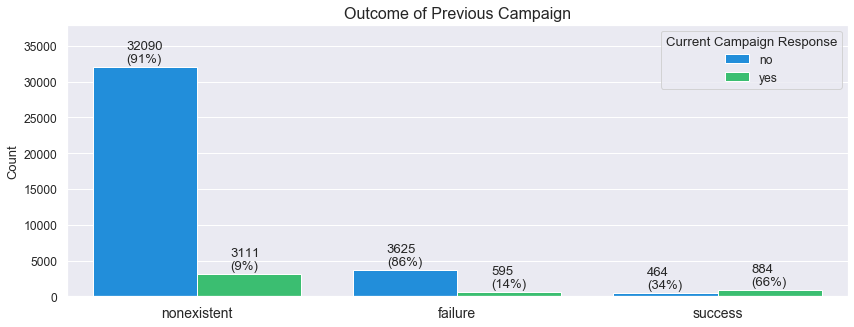

In [36]:
# poutcome column
plt.figure(figsize=(14,5))
ax = sns.countplot(x='poutcome', data=df, hue='response')
x = list(df['poutcome'].value_counts())
y = x + x
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    #ax.text(p.get_x()+0.035, height+700, f"{height} ({round(heightp,0)}%)")
    ax.text(p.get_x()+0.13, height+2500, '%.0f'%(height))
    ax.text(p.get_x()+0.13, height+700, '(%.0f%%)'%(heightp))
    z += 1
ax.set_title("Outcome of Previous Campaign",size=16)
ax.set_ylim([0,38000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Current Campaign Response',loc=1)

**Note:** It seems that customers that subscribed to a term deposit in previous campaigns are more likely to subscribe to a new term deposit in the current campaign.
#### Contact Type

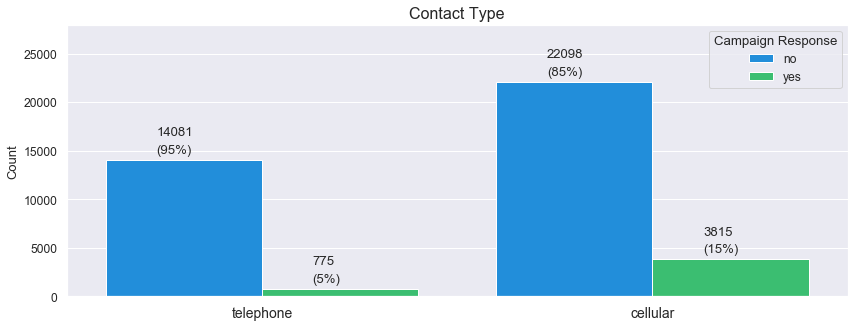

In [37]:
# contact column
plt.figure(figsize=(14,5))
ax = sns.countplot(x='contact', data=df, hue='response')
y = [14856,25913,14856,25913]
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    #ax.text(p.get_x()+0.09, height+700, f"{height} ({round(heightp,0)}%)")
    ax.text(p.get_x()+0.13, height+2500, '%.0f'%(height))
    ax.text(p.get_x()+0.13, height+700, '(%.0f%%)'%(heightp))
    z += 1
ax.set_title("Contact Type",size=16)
ax.set_ylim([0,28000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

**Note:** The above chart shows that cell phone calls worked more effectively than home phone calls.
#### Last Contact Month of The Year

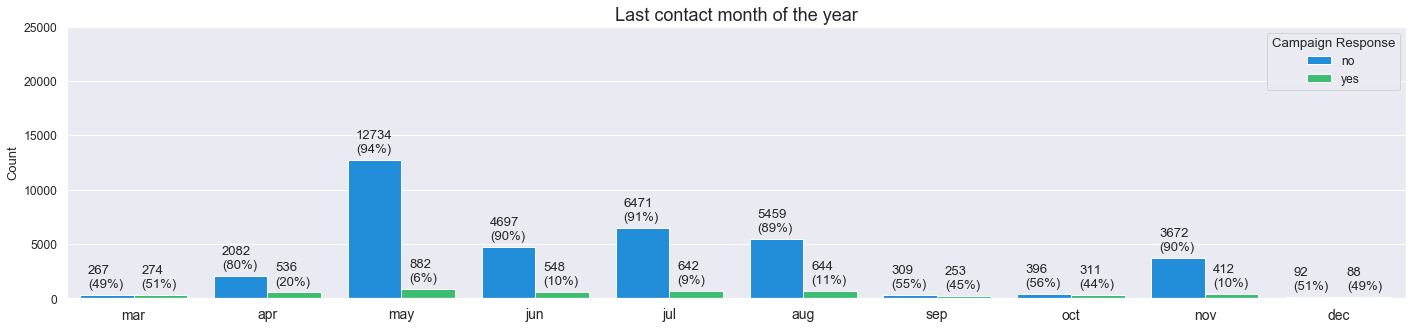

In [38]:
# Last Contact Month of The Year
plt.figure(figsize=(24,5))
ax = sns.countplot(x='month', data=df, hue='response',
                   order=['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
x = list(df['month'].value_counts())
y = [541,2618,13616,5245,7113,6103,562,707,4084,180,541,2618,13616,5245,7113,6103,562,707,4084,180]
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    ax.text(p.get_x()+0.06, height+2000, f"{height}")
    ax.text(p.get_x()+0.06, height+700, '(%.0f%%)'%(heightp))
    z += 1
ax.set_title("Last contact month of the year",size=18)
ax.set_ylim([0,25000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

**Note:** The above chart shows that customers who were contacted in the month of March (51%), September (45%), October (44%) and December (49%) responded better to the campaigns.
#### Day of The Week

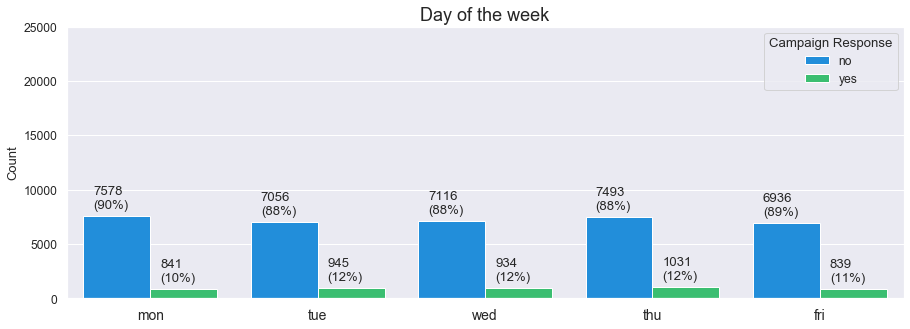

In [39]:
# Day of The Week
plt.figure(figsize=(15,5))
ax = sns.countplot(x='day_of_week', data=df, hue='response')
x = list(df['day_of_week'].value_counts())
y = [8419,8001,8050,8524,7775,8419,8001,8050,8524,7775]
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    ax.text(p.get_x()+0.06, height+2000, f"{height}")
    ax.text(p.get_x()+0.06, height+700, '(%.0f%%)'%(heightp))
    z += 1
ax.set_title("Day of the week",size=18)
ax.set_ylim([0,25000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

**Note:** The above chart shows that days of the week do not make much difference to the customer response.
#### Numerical Variables

In [40]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,40769.000000,40769.000000,40769.000000,40769.000000,40769.000000,40769.000000,40769.000000,40769.000000,40769.000000,40769.000000
mean,39.975055,258.321666,2.566239,962.733768,0.172901,0.080610,93.574918,-40.516020,3.619577,5167.015764
std,10.400510,259.252765,2.768515,186.272825,0.494927,1.570076,0.578516,4.626577,1.734412,72.236186
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Age, Duration, No of Contacts Made in The Current Campaign, No of Days Since Last Contact, and No of Contacts Made Before This Campaign

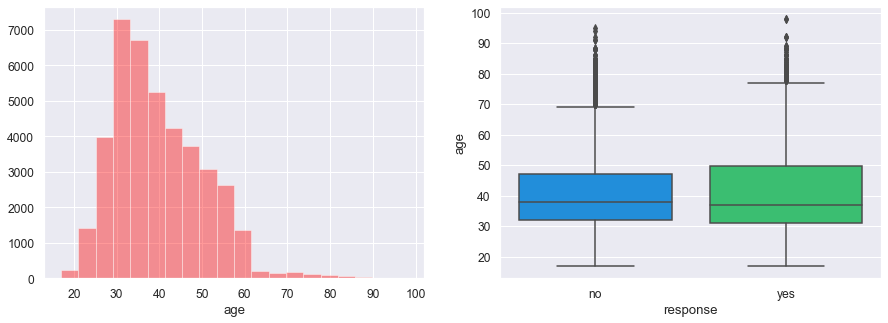

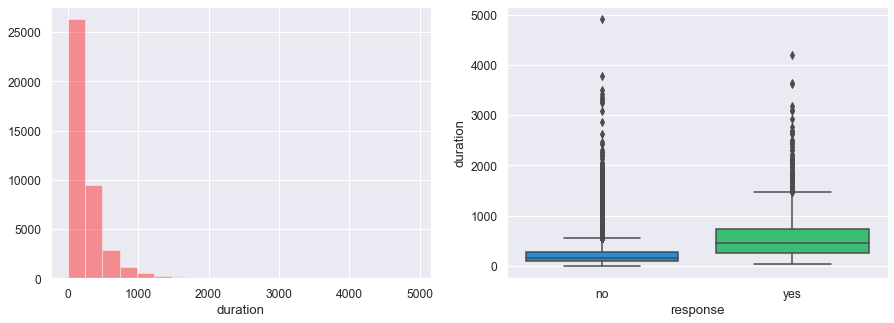

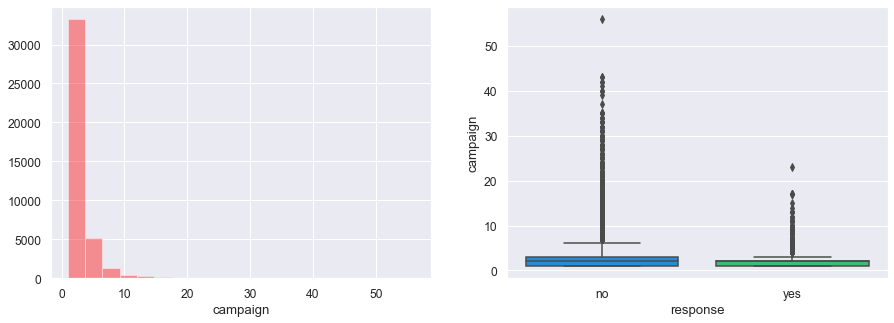

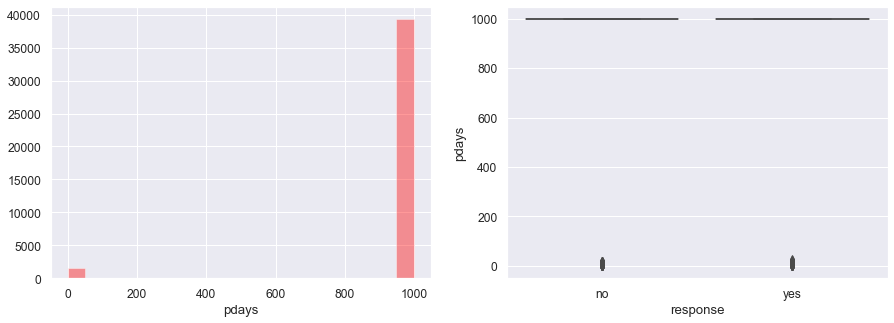

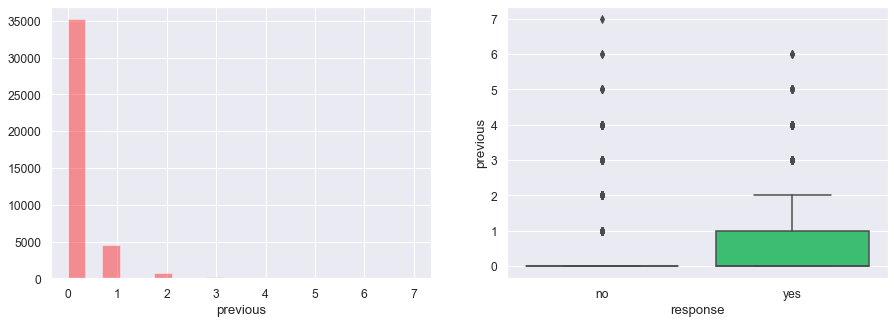

In [41]:
numcol = ['age','duration','campaign','pdays','previous']
for col in numcol:
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(df[col],kde=False,bins=20,color='red',ax=ax[0])
    sns.boxplot(y=df[col], x=df['response'],ax=ax[1])

#### Customer Age Group

In [42]:
# create age_group column
df['age_group']=df['age']

# assign each age to age_group
df.loc[(df['age_group']<30), 'age_group'] = 25
df.loc[(df['age_group']>=30) & (df['age_group']<40), 'age_group'] = 35
df.loc[(df['age_group']>=40) & (df['age_group']<50), 'age_group'] = 45
df.loc[(df['age_group']>=50) & (df['age_group']<60), 'age_group'] = 55
df.loc[(df['age_group']>=60), 'age_group'] = 65

# label the group
df.loc[(df['age_group']==25), 'age_group'] = '<30'
df.loc[(df['age_group']==35), 'age_group'] = '30-39'
df.loc[(df['age_group']==45), 'age_group'] = '40-49'
df.loc[(df['age_group']==55), 'age_group'] = '50-59'
df.loc[(df['age_group']==65), 'age_group'] = '60+'

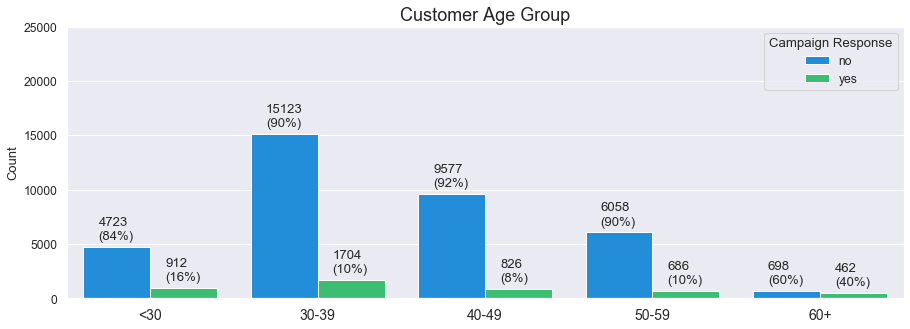

In [43]:
# plot the data
plt.figure(figsize=(15,5))
ax = sns.countplot(x='age_group', data=df, hue='response', order=['<30','30-39','40-49','50-59','60+'])
x = list(df['age_group'].value_counts())
y = [5635,16827,10403,6744,1160,5635,16827,10403,6744,1160]
z = 0
for p in ax.patches:
    height = p.get_height()
    heightp = height/y[z]*100
    ax.text(p.get_x()+0.09, height+2000, f"{height}")
    ax.text(p.get_x()+0.09, height+700, '(%.0f%%)'%(heightp))
    z += 1
ax.set_title("Customer Age Group",size=18)
ax.set_ylim([0,25000])
ax.set_ylabel('Count',size=13)
ax.set_xlabel('',size=14)
ax.tick_params(axis='x', which='major', labelsize=14)
ax.legend(title='Campaign Response',loc=1)

**Note:** From the chart, it can be seen that customers under age 30 and 60+ have higher subscription rate compared to others in different age groups
#### Call Duration vs Number of Calls vs No of Days Since Last Contact

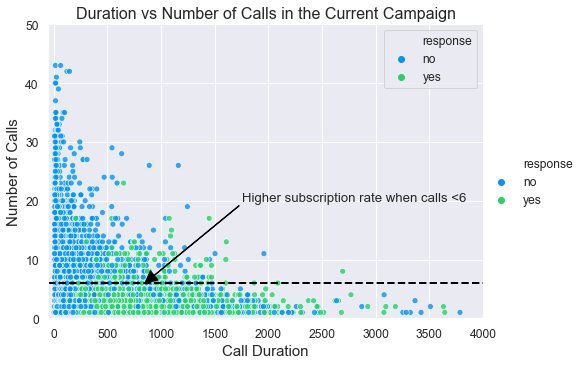

In [44]:
# duration vs number of calls in the current campaign
sns.relplot(x="duration", y="campaign", hue="response", alpha=.8, height=5, data=df, aspect = 1.4, legend = 'brief')
plt.title("Duration vs Number of Calls in the Current Campaign",size=16)
plt.ylabel('Number of Calls',size=15)
plt.xlabel('Call Duration',size=15)
plt.axis([-50,4000,0,50])
plt.axhline(y=6, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <6',xytext = (1750,20),
             arrowprops=dict(color = 'k', width=0.5),xy=(850,6))
plt.legend(title='',loc=1)

**Note:** The above charts shows that higher subscription rate was achieved when the number of calls is less than six times. This makes sense as customers tend to become aggitated and less likely to respond well to a marketing campaign when they are called numerous times by the marketers.

<Figure size 864x288 with 0 Axes>

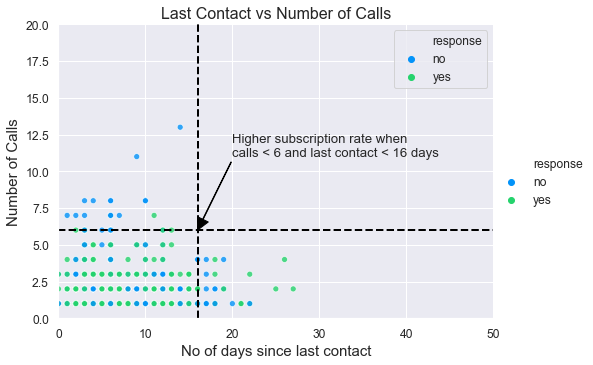

In [45]:
# last contact vs number of calls made
plt.figure(figsize=(12,4))
sns.relplot(x="pdays", y="campaign", hue="response", alpha=.8, height=5, data=df, aspect = 1.4, legend = 'brief')
plt.title("Last Contact vs Number of Calls",size=16)
plt.ylabel('Number of Calls',size=15)
plt.xlabel('No of days since last contact',size=15)
plt.axis([0,50,0,20])
plt.axhline(y=6, linewidth=2, color="k", linestyle='--')
plt.axvline(x=16, linewidth=2, color='k',linestyle='--')
plt.annotate('Higher subscription rate when',xytext = (20,12),xy=(16,6))
plt.annotate('calls < 6 and last contact < 16 days',xytext = (20,11),
             arrowprops=dict(color = 'k', width=0.5),xy=(16,6))
plt.legend(title='',loc=1)

**Note:** Higher subscription rate was achieved when the number of calls is less than six times and the customer was contacted within the last 16 days.

<Figure size 864x216 with 0 Axes>

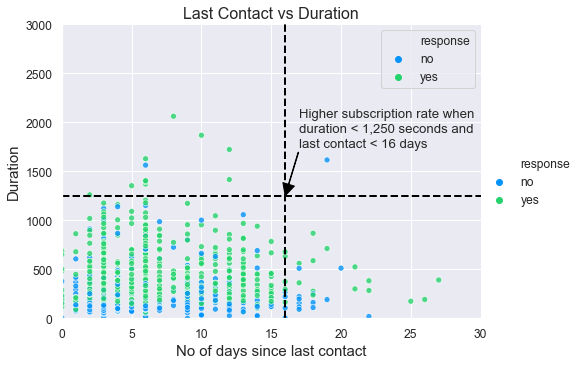

In [46]:
# duration vs last contact
plt.figure(figsize=(12,3))
sns.relplot(x="pdays", y="duration", hue="response", alpha=.8, height=5, data=df, aspect = 1.4, legend = 'brief')
plt.title("Last Contact vs Duration",size=16)
plt.ylabel('Duration',size=15)
plt.xlabel('No of days since last contact',size=15)
plt.axis([0,30,0,3000])
plt.axhline(y=1250, linewidth=2, color="k", linestyle='--')
plt.axvline(x=16, linewidth=2, color='k',linestyle='--')
plt.annotate('Higher subscription rate when',xytext = (17,2050),xy=(16,1250))
plt.annotate('duration < 1,250 seconds and',xytext = (17,1900),xy=(16,1250))
plt.annotate("last contact < 16 days",xytext = (17,1750),
             arrowprops=dict(color = 'k', width=0.5),xy=(16,1250))
plt.legend(title='',loc=1)

**Note:** Higher subscription rate was achieved when the call duration is less than 1,250 seconds (approximately 21 minutes) and the customer was contacted within the last 16 days. 
#### Outliers
Small amounts of outliers in the 'campaign', 'previous' and 'duration' variables will be removed from the dataset.

In [47]:
# remove outliers in the 'campaign', 'previous' and 'duration' columns
df = df[df['campaign']<=20]
df = df[df['previous']<=3]
df = df[df['duration']<=2000]

#### Socio-Economic Variables

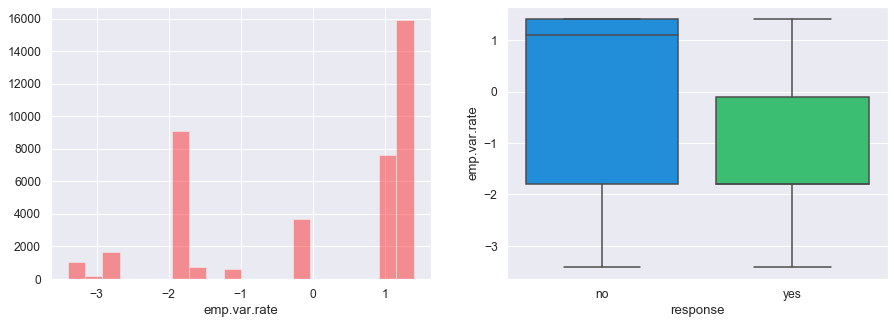

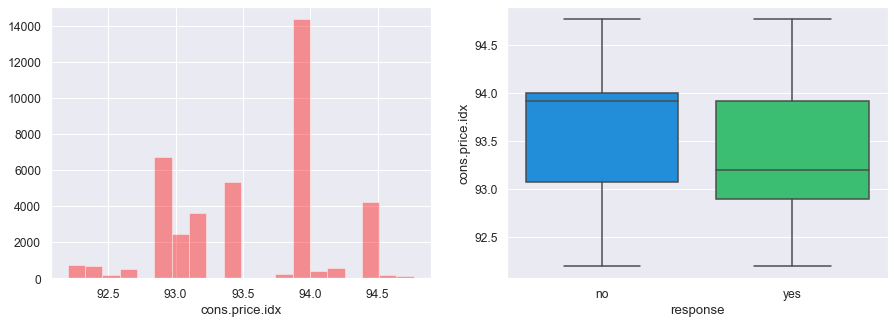

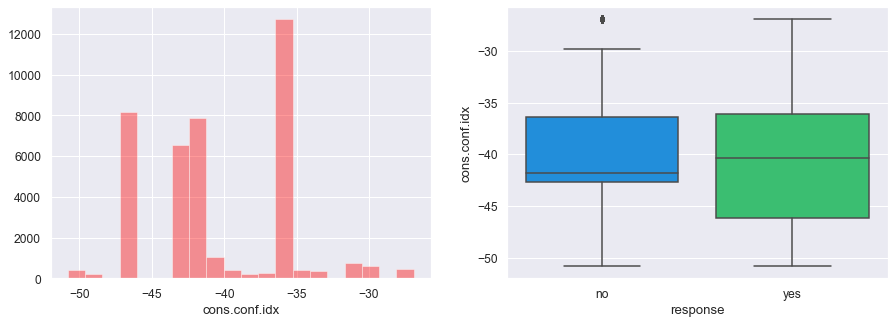

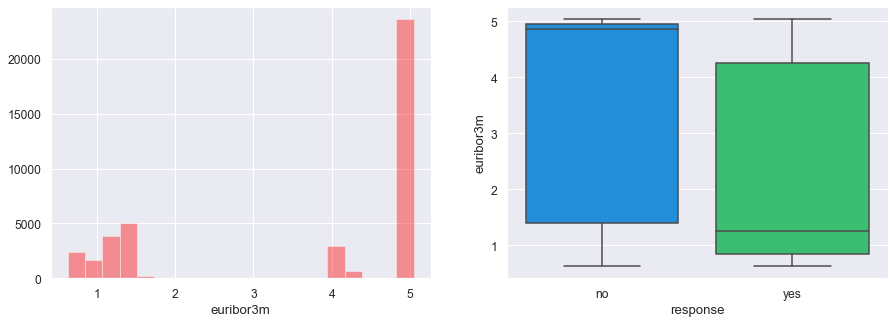

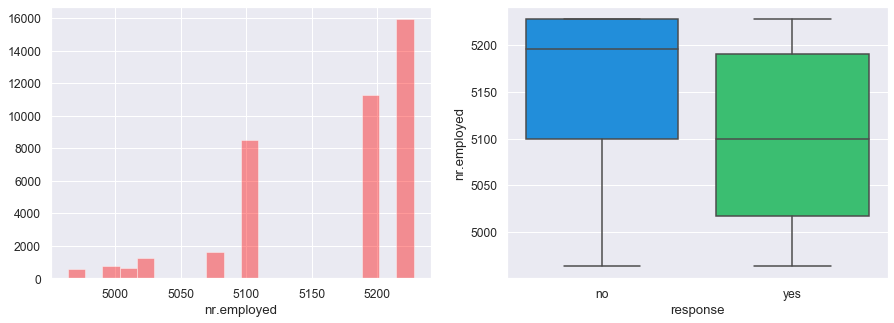

In [48]:
numcol = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
for col in numcol:
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(df[col],kde=False,bins=20,color='red',ax=ax[0])
    sns.boxplot(y=df[col], x=df['response'],ax=ax[1])

#### Data Transformation
The *LabelEncoder* class from sklearn will be used to convert categorical variables to numbers so the predicting model can understand them better.

In [49]:
# use LabelEncoder to convert categorical variables to numbers so the predicting model can understand them better
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
columns=['job','marital','housing','loan','contact','month','day_of_week',
         'education','response','poutcome','default','age_group']
for column in columns:
    df[column] = labelencoder.fit_transform(df[column])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_group
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2
2,37,7,1,3,0,1,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,7,1,3,0,0,1,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2


Let's use the *heatmap* to check the correlation between numerical variables and the response variable.

(11, 0)

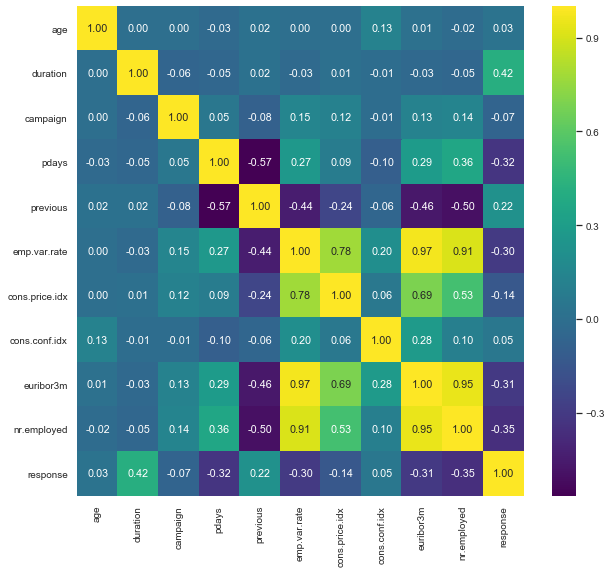

In [50]:
# create a heatmap for the numerical variables
numerical_columns = ['age','duration','campaign','pdays',
                     'previous','emp.var.rate','cons.price.idx',
                     'cons.conf.idx','euribor3m','nr.employed','response']
sns.set(font_scale=0.9)
plt.figure(figsize=(10,9))
sns.heatmap(df[numerical_columns].corr(),annot=True,cmap='viridis',fmt='.2f',)
plt.ylim(11, 0)

**Note:** From the heat map, it can be seen that call duration (0.42) and number of days since last contact (-0.32) have higher correlation to customer response compared to other numericals in the dataset

In [51]:
# drop the age column (will use the age group column for our modelling)
df = df.drop(columns='age',axis=1)

The sklearn *MinMaxScaller* will be used to normalize the data to address the scaling issue in the numerical variables.

In [52]:
# MinMax Scaler to normalise the data
new_columns = list(df.columns)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
df = pd.DataFrame(scaled_df, columns=new_columns)
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_group
0,0.3,0.5,0.0,0.0,0.0,0.0,1.0,0.666667,0.25,0.130893,...,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.50
1,0.7,0.5,0.6,0.5,0.0,0.0,1.0,0.666667,0.25,0.074724,...,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.50
2,0.7,0.5,0.6,0.0,1.0,0.0,1.0,0.666667,0.25,0.113340,...,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.00
3,0.0,0.5,0.2,0.0,0.0,0.0,1.0,0.666667,0.25,0.075727,...,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.25
4,0.7,0.5,0.6,0.0,0.0,1.0,1.0,0.666667,0.25,0.153962,...,1.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0,0.50


Lastly, because the dataset is imbalanced (only 11% customers subscribed to a term deposit), the SMOTE sampling method from imblearn library will be used to synthesize new samples from the minority class (‘Yes’) to balance the data (so the number of ‘Yes’ are equal to the number of ‘No’). This will help the model learn both classes (‘Yes’ and ‘No’) better and yield better predictions on new data.

In [53]:
# use SMOTE to balance the data
X = df.drop(columns='response',axis=1)
y = df['response']

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# split data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# SMOTE balancing on the training data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

print("Number of 'No' in the Training Set:", y_train[y_train==0].count())
print("Number of 'Yes' in the Training Set:", y_train[y_train==1].count())

Number of 'No' in the Training Set: 26971
Number of 'Yes' in the Training Set: 26971


In [54]:
# The test data remains imbalanced as they will be used to test the model
print("Number of 'No' in the Test Set:", y_test[y_test==0].count())
print("Number of 'Yes' in the Test Set:", y_test[y_test==1].count())

Number of 'No' in the Test Set: 8991
Number of 'Yes' in the Test Set: 1125


Next, we will use different statistic and modelling techniques to fit the data and create models to predict customer response.
### Logistic Regression


In [55]:
# using grid search to find the best parameters for our logistic regession model 
param_grid = {'solver': ['lbfgs'],
              'C': [5,10,50]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000,class_weight='balanced'), param_grid, cv=10,
                          scoring='f1',return_train_score=True)
grid_search_lr.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search_lr.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lr.best_score_))
print("Best estimator:\n{}".format(grid_search_lr.best_estimator_))

Parameter grid:
{'solver': ['lbfgs'], 'C': [5, 10, 50]}
Test set score: 0.59
Best parameters: {'C': 50, 'solver': 'lbfgs'}
Best cross-validation score: 0.88
Best estimator:
LogisticRegression(C=50, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=20,shuffle=True,random_state=42)
pred_test_full = 0
r_score_lr = []
f_score_lr = []

for train_index,test_index in kf.split(X,y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    # SMOTE balancing on the training data
    oversample = SMOTE()
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    
    #model
    lr = LogisticRegression(class_weight='balanced', C=50, max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    rscore_lr = roc_auc_score(y_test, y_pred_lr)
    fscore_lr = f1_score(y_test, y_pred_lr)
    r_score_lr.append(rscore_lr)
    f_score_lr.append(fscore_lr)

print('ROC AUC score (Mean):', round(np.mean(r_score_lr),2))
print('ROC AUC score (Standard Deviation):', round(np.std(r_score_lr),2))

print('f1-score (Mean):', round(np.mean(f_score_lr),2))
print('f1-score (Standard Deviation):', round(np.std(f_score_lr),2))

ROC AUC score (Mean): 0.86
ROC AUC score (Standard Deviation): 0.01
f1-score (Mean): 0.58
f1-score (Standard Deviation): 0.02


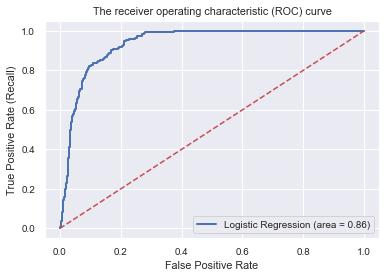

In [117]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_lr = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, linewidth=2, label='Logistic Regression (area = %0.2f)' %roc_auc_lr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('The receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [118]:
from sklearn.metrics import confusion_matrix, classification_report
print("Logistic Regression:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression:

Confusion Matrix:
[[1540  258]
 [  32  193]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.86      0.91      1798
         1.0       0.43      0.86      0.57       225

    accuracy                           0.86      2023
   macro avg       0.70      0.86      0.74      2023
weighted avg       0.92      0.86      0.88      2023



### K-Nearest Neighbor

In [71]:
# using grid search to find the best parameters for the KNN model 
param_grid = {'n_neighbors': [1,3,5]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.neighbors import KNeighborsClassifier
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10,
                          scoring='f1',return_train_score=True)
grid_search_knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search_knn.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))
print("Best estimator:\n{}".format(grid_search_knn.best_estimator_))

Parameter grid:
{'n_neighbors': [1, 3, 5]}
Test set score: 0.46
Best parameters: {'n_neighbors': 1}
Best cross-validation score: 0.89
Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [72]:
kf = StratifiedKFold(n_splits=20,shuffle=True,random_state=42)
pred_test_full = 0
r_score_knn = []
f_score_knn = []

for train_index,test_index in kf.split(X,y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    # SMOTE balancing on the training data
    oversample = SMOTE()
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    
    #model
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    rscore_knn = roc_auc_score(y_test, y_pred_knn)
    fscore_knn = f1_score(y_test, y_pred_knn)
    r_score_knn.append(rscore_knn)
    f_score_knn.append(fscore_knn)

print('ROC AUC score (Mean):', round(np.mean(r_score_knn),2))
print('ROC AUC score (Standard Deviation):', round(np.std(r_score_knn),2))

print('f1-score (Mean):', round(np.mean(f_score_knn),2))
print('f1-score (Standard Deviation):', round(np.std(f_score_knn),2))

ROC AUC score (Mean): 0.69
ROC AUC score (Standard Deviation): 0.02
f1-score (Mean): 0.45
f1-score (Standard Deviation): 0.03


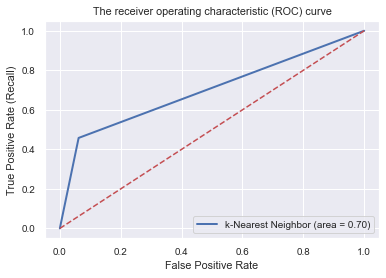

In [75]:
roc_auc_knn = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, linewidth=2, label='k-Nearest Neighbor (area = %0.2f)' %roc_auc_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('The receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [76]:
print("k-Nearest Neighbor:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

k-Nearest Neighbor:

Confusion Matrix:
[[1687  111]
 [ 122  103]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1798
         1.0       0.48      0.46      0.47       225

    accuracy                           0.88      2023
   macro avg       0.71      0.70      0.70      2023
weighted avg       0.88      0.88      0.88      2023



### Random Forest Classifier

In [73]:
# using grid search to find the best parameters for the KNN model 
param_grid = {'n_estimators': [100,500],
              'max_leaf_nodes': [256,512],
              'max_features': [5,10,20]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.ensemble import RandomForestClassifier
grid_search_rfc = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=10,
                          scoring='f1', return_train_score=True)
grid_search_rfc.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search_rfc.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_rfc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rfc.best_score_))
print("Best estimator:\n{}".format(grid_search_rfc.best_estimator_))

Parameter grid:
{'n_estimators': [100, 500], 'max_leaf_nodes': [256, 512], 'max_features': [5, 10, 20]}
Test set score: 0.65
Best parameters: {'max_features': 5, 'max_leaf_nodes': 256, 'n_estimators': 500}
Best cross-validation score: 0.87
Best estimator:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=256, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [77]:
kf = StratifiedKFold(n_splits=20,shuffle=True,random_state=42)
pred_test_full = 0
r_score_rfc = []
f_score_rfc = []

for train_index,test_index in kf.split(X,y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    # SMOTE balancing on the training data
    oversample = SMOTE()
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    
    #model
    rfc = RandomForestClassifier(n_estimators=500,max_leaf_nodes=256,max_features=5,
                             class_weight='balanced')
    rfc.fit(X_train, y_train)
    y_pred_rfc = rfc.predict(X_test)
    rscore_rfc = roc_auc_score(y_test, y_pred_rfc)
    fscore_rfc = f1_score(y_test, y_pred_rfc)
    r_score_rfc.append(rscore_rfc)
    f_score_rfc.append(fscore_rfc)

print('ROC AUC score (Mean):', round(np.mean(r_score_rfc),2))
print('ROC AUC score (Standard Deviation):', round(np.std(r_score_rfc),2))

print('f1-score (Mean):', round(np.mean(f_score_rfc),2))
print('f1-score (Standard Deviation):', round(np.std(f_score_rfc),2))

ROC AUC score (Mean): 0.88
ROC AUC score (Standard Deviation): 0.01
f1-score (Mean): 0.63
f1-score (Standard Deviation): 0.02


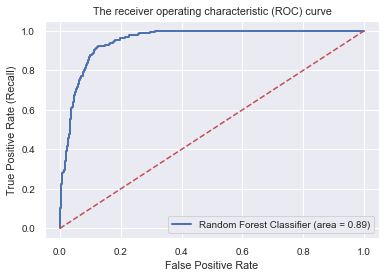

In [78]:
roc_auc_rfc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, linewidth=2, label='Random Forest Classifier (area = %0.2f)' %roc_auc_rfc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('The receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [115]:
# top ten important features
pd.DataFrame(rfc.feature_importances_,index=X_train.columns,
             columns=['Features Importance']).sort_values('Features Importance',ascending=False).head(20)

,Features Importance
duration,0.468627
nr.employed,0.111469
euribor3m,0.097551
emp.var.rate,0.069676
cons.conf.idx,0.043719
campaign,0.039924
month,0.031060
cons.price.idx,0.030100
pdays,0.019661
day_of_week,0.014784


In [80]:
print("Random Forest Classifier:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rfc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rfc))

Random Forest Classifier:

Confusion Matrix:
[[1602  196]
 [  26  199]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.94      1798
         1.0       0.50      0.88      0.64       225

    accuracy                           0.89      2023
   macro avg       0.74      0.89      0.79      2023
weighted avg       0.93      0.89      0.90      2023



### Gradient Boosting Classifier

In [81]:
# using grid search to find the best parameters for the Gradient Boosting model
param_grid = {'n_estimators': [200,500],
              'learning_rate': [0.1,1],
              'subsample': [.25,1]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.ensemble import GradientBoostingClassifier
grid_search_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=10,
                          scoring='f1', return_train_score=True)
grid_search_gbc.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search_gbc.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search_gbc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_gbc.best_score_))
print("Best estimator:\n{}".format(grid_search_gbc.best_estimator_))

Parameter grid:
{'n_estimators': [200, 500], 'learning_rate': [0.1, 1], 'subsample': [0.25, 1]}
Test set score: 0.63
Best parameters: {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.25}
Best cross-validation score: 0.86
Best estimator:
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.25, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [85]:
kf = StratifiedKFold(n_splits=20,shuffle=True,random_state=42)
pred_test_full = 0
r_score_gbc = []
f_score_gbc = []

for train_index,test_index in kf.split(X,y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    
    # SMOTE balancing on the training data
    oversample = SMOTE()
    X_train, y_train = oversample.fit_resample(X_train, y_train)
    
    #model
    gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, subsample=0.25)
    gbc.fit(X_train, y_train)
    y_pred_gbc = gbc.predict(X_test)
    rscore_gbc = roc_auc_score(y_test, y_pred_gbc)
    fscore_gbc = f1_score(y_test, y_pred_gbc)
    r_score_gbc.append(rscore_gbc)
    f_score_gbc.append(fscore_gbc)

print('ROC AUC score (Mean):', round(np.mean(r_score_gbc),2))
print('ROC AUC score (Standard Deviation):', round(np.std(r_score_gbc),2))

print('f1-score (Mean):', round(np.mean(f_score_gbc),2))
print('f1-score (Standard Deviation):', round(np.std(f_score_gbc),2))

ROC AUC score (Mean): 0.83
ROC AUC score (Standard Deviation): 0.02
f1-score (Mean): 0.64
f1-score (Standard Deviation): 0.02


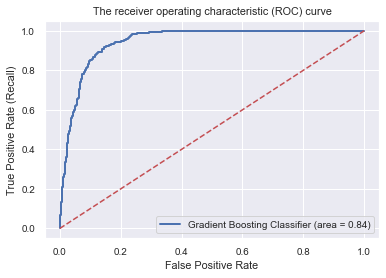

In [86]:
roc_auc_gbc = roc_auc_score(y_test, gbc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, linewidth=2, label='Gradient Boosting Classifier (area = %0.2f)' %roc_auc_gbc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('The receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [87]:
print("Gradient Boosting Classifier:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbc))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc))

Gradient Boosting Classifier:

Confusion Matrix:
[[1673  125]
 [  56  169]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      1798
         1.0       0.57      0.75      0.65       225

    accuracy                           0.91      2023
   macro avg       0.77      0.84      0.80      2023
weighted avg       0.92      0.91      0.92      2023



### Statistic Tests

In [119]:
from scipy import stats

# logistic regression vs knn
# paired student's t-test
student_ttest_f1 = stats.ttest_rel(f_score_lr, f_score_knn).pvalue*0.5
student_ttest_r1 = stats.ttest_rel(r_score_lr, r_score_knn).pvalue*0.5
# Wilcoxon signed-rank test
wilcoxon_test_f1 = stats.wilcoxon(f_score_lr, f_score_knn).pvalue
wilcoxon_test_r1 = stats.wilcoxon(r_score_lr, r_score_knn).pvalue

print("Paired Student's t-test (f1-score):", student_ttest_f1)
print("Wilcoxon Signed-Rank test (f1-score):", wilcoxon_test_f1)

print("Paired Student's t-test (roc-auc-score):", student_ttest_r1)
print("Wilcoxon Signed-Rank test (roc-auc-score):", wilcoxon_test_r1)

Paired Student's t-test (f1-score): 1.9383506112398614e-14
Wilcoxon Signed-Rank test (f1-score): 8.857457687863547e-05
Paired Student's t-test (roc-auc-score): 5.786879316584821e-20
Wilcoxon Signed-Rank test (roc-auc-score): 8.857457687863547e-05


In [120]:
# logistic regression vs random forest classifier
# paired student's t-test
student_ttest_f2 = stats.ttest_rel(f_score_lr, f_score_rfc).pvalue*0.5
student_ttest_r2 = stats.ttest_rel(r_score_lr, r_score_rfc).pvalue*0.5
# Wilcoxon signed-rank test
wilcoxon_test_f2 = stats.wilcoxon(f_score_lr, f_score_rfc).pvalue
wilcoxon_test_r2 = stats.wilcoxon(r_score_lr, r_score_rfc).pvalue

print("Paired Student's t-test (f1-score):", student_ttest_f2)
print("Wilcoxon Signed-Rank test (f1-score):", wilcoxon_test_f2)

print("Paired Student's t-test (roc-auc-score):", student_ttest_r2)
print("Wilcoxon Signed-Rank test (roc-auc-score):", wilcoxon_test_r2)

Paired Student's t-test (f1-score): 6.299513102925368e-16
Wilcoxon Signed-Rank test (f1-score): 8.857457687863547e-05
Paired Student's t-test (roc-auc-score): 1.1422510256195118e-07
Wilcoxon Signed-Rank test (roc-auc-score): 8.857457687863547e-05


In [121]:
# logistic regression vs gradient boosting
# paired student's t-test
student_ttest_f3 = stats.ttest_rel(f_score_lr, f_score_gbc).pvalue*0.5
student_ttest_r3 = stats.ttest_rel(r_score_lr, r_score_gbc).pvalue*0.5
# Wilcoxon signed-rank test
wilcoxon_test_f3 = stats.wilcoxon(f_score_lr, f_score_gbc).pvalue
wilcoxon_test_r3 = stats.wilcoxon(r_score_lr, r_score_gbc).pvalue

print("Paired Student's t-test (f1-score):", student_ttest_f3)
print("Wilcoxon Signed-Rank test (f1-score):", wilcoxon_test_f3)

print("Paired Student's t-test (roc-auc-score):", student_ttest_r3)
print("Wilcoxon Signed-Rank test (roc-auc-score):", wilcoxon_test_r3)

Paired Student's t-test (f1-score): 3.544656803340811e-10
Wilcoxon Signed-Rank test (f1-score): 8.857457687863547e-05
Paired Student's t-test (roc-auc-score): 9.99968960176671e-10
Wilcoxon Signed-Rank test (roc-auc-score): 8.857457687863547e-05


In [122]:
# random forest vs gradient boosting
# paired student's t-test
student_ttest_f4 = stats.ttest_rel(f_score_rfc, f_score_gbc).pvalue*0.5
student_ttest_r4 = stats.ttest_rel(r_score_rfc, r_score_gbc).pvalue*0.5
# Wilcoxon signed-rank test
wilcoxon_test_f4 = stats.wilcoxon(f_score_rfc, f_score_gbc).pvalue
wilcoxon_test_r4 = stats.wilcoxon(r_score_rfc, r_score_gbc).pvalue

print("Paired Student's t-test (f1-score):", student_ttest_f4)
print("Wilcoxon Signed-Rank test (f1-score):", wilcoxon_test_f4)

print("Paired Student's t-test (roc-auc-score):", student_ttest_r4)
print("Wilcoxon Signed-Rank test (roc-auc-score):", wilcoxon_test_r4)

Paired Student's t-test (f1-score): 0.20544587987197427
Wilcoxon Signed-Rank test (f1-score): 0.2471446025403431
Paired Student's t-test (roc-auc-score): 4.49338747134041e-12
Wilcoxon Signed-Rank test (roc-auc-score): 8.857457687863547e-05


## Thank you!